In [1]:
from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import requests
import pathlib
from pathlib import Path
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

### Set up the default size or style if you are working with one kind of data

In [2]:
sns.set_style("darkgrid")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Get data

In [3]:
dataset_link = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv"

# Set up the paths
data_path = Path("data/")
dataset_path = data_path / "medical_df"

if dataset_path.is_dir():
  print(f"{dataset_path} already exists, skipping creation")
else:
  print(f"{dataset_path} does not exist, creating one...")
  dataset_path.mkdir(parents = True, exist_ok = True)

# Download the dataset
with open(dataset_path / "insuranve.csv", "wb") as f:
  request = requests.get(dataset_link)
  print("Downloading insurace.csv dataset")
  f.write(request.content)

data/medical_df does not exist, creating one...


In [4]:
medical_df = pd.read_csv("/content/data/medical_df/insuranve.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
medical_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


### **Age**

* The minimum age in the dataset is 18 and the maximum is 64.

In [7]:
medical_df.age.describe()

,age
count,1338.000000
mean,39.207025
std,14.049960
min,18.000000
25%,27.000000
50%,39.000000
75%,51.000000
max,64.000000


In [8]:
fig = px.histogram(medical_df,
                   x = "age",
                   marginal = "box",
                   nbins = 47,
                   title = "Distribution of Age")
fig.update_layout(bargap = 0.1)
fig.show()

The distribution of ages in the dataset is almost uniform except for ages 18 and 19 which seems to have as many customers as other ages.

### **Body Mass Index**
Look into **BMI** of customers and try to understand it

In [9]:
fig = px.histogram(medical_df,
                   x = 'bmi',
                   marginal = "box",
                   color_discrete_sequence = ['red'],
                   title = 'Distribution of BMI (Body Mass Index)')
fig.update_layout(bargap = 0.1)
fig.show()

In [10]:
fig = px.histogram(medical_df,
                   x = "charges",
                   marginal = 'box',
                   color = "smoker",
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [11]:
fig = px.histogram(medical_df,
                   x = "charges",
                   marginal = 'box',
                   color = "sex",
                   color_discrete_sequence = ['green', 'grey'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [12]:
fig = px.histogram(medical_df,
                   x = "charges",
                   marginal = 'box',
                   color = "region",
                   color_discrete_sequence = ['red', 'green', 'blue', 'yellow'],
                   title = 'Annual Medical Charges')
fig.update_layout(bargap = 0.1)
fig.show()

In [13]:
medical_df.smoker.value_counts()

,count
smoker,
no,1064
yes,274


In [14]:
px.histogram(medical_df, x = "smoker", color = "sex", title = "Smoker")

In [15]:
fig = px.scatter(medical_df,
                 x = "age",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.4,
                 hover_data = ['sex'],
                 title = 'Age VS Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [16]:
fig = px.scatter(medical_df,
                 x = "bmi",
                 y = "charges",
                 color = "smoker",
                 opacity = 0.4,
                 hover_data = ['sex'],
                 title = 'BMI VS Charges')
fig.update_traces(marker_size = 5)
fig.show()

When you turn on yes for smoker, you realise that there is a upward trend. As the BMI increases the charges incurred also increases.
We can get some value of information from this.

In [17]:
px.violin(medical_df, x = "children", y = "charges")

### **Correlation**
We can tell that the value in some columns are more closely related to the values in "charges" compared to other columns e.g, "age" and "charges" are seem to be growing together whereas "bmi" and "charges" don't

This relationship is often expressed numerally using a measure called the correlation coefficient, which can be computed using the `.corr` method of pandas series

In [18]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306476)

In [19]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362895)

In [20]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790478)

In [21]:
smoker_values = {'no': 0, 'yes': 1}
smoker_numeric = medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.787251430498478)

In [22]:
px.scatter(medical_df, x = "age", y = "age")

In [23]:
medical_df.corr(numeric_only = True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

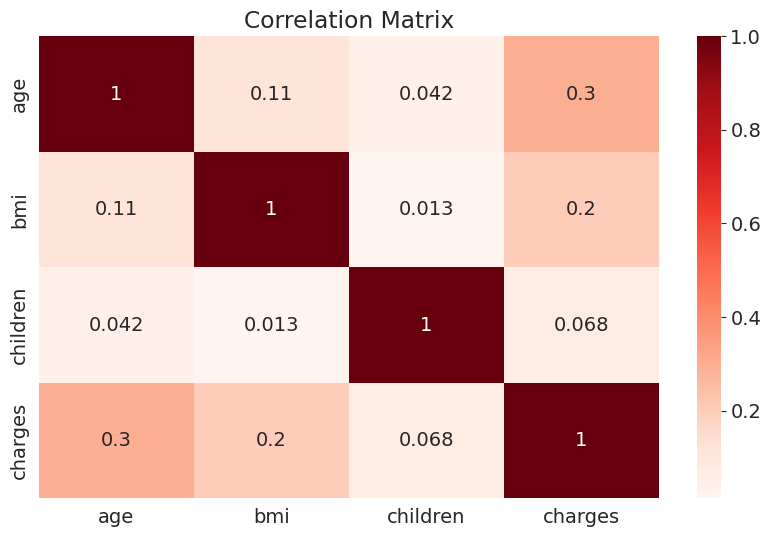

In [24]:
sns.heatmap(medical_df.corr(numeric_only = True), cmap = "Reds", annot = True)
plt.title("Correlation Matrix")

## Linear Regression using a Single Feature

We know that the "smoker" and "age" columns have the strongest correlation with "charges".
Let's try to find a way of estimating the value of "charges" using the value of "age" for non-smokers. First, let's create a data frame containing just the data for non-smokers

In [25]:
non_smokers_df = medical_df[medical_df.smoker == "no"]
non_smokers_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


<Axes: title={'center': 'Age VS Charges'}, xlabel='age', ylabel='charges'>

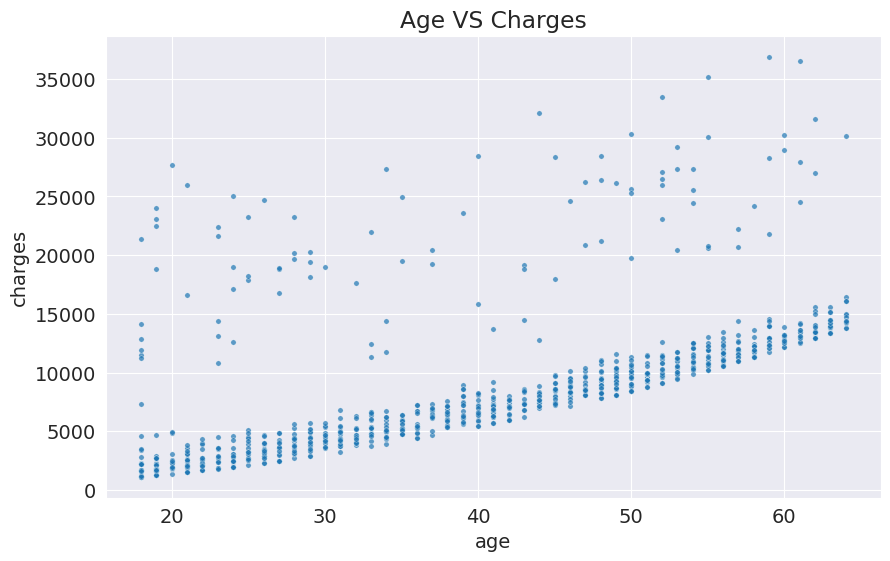

In [26]:
plt.title("Age VS Charges")
sns.scatterplot(data = non_smokers_df, x = 'age',
                y = 'charges',
                alpha = 0.7,
                s = 15)

In [27]:
def estimate_charges(age, w, b):
  return w * age + b

Let's guess the values of `w` and `b` and use them to estimate the value of charges

In [28]:
w = 50
b = 100

In [29]:
ages = non_smokers_df.age
estimated_charges = estimate_charges(ages, w, b)
estimated_charges

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


We can compare them with the actual data

In [30]:
non_smokers_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


The answers are pretty bad, so our guess of `w` and `b` was very wrong

Text(0, 0.5, 'Estimated Charges')

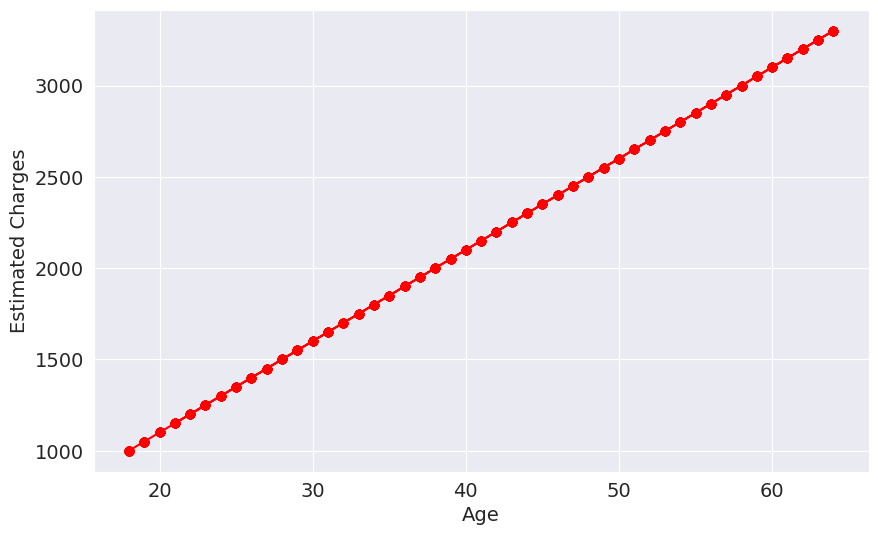

In [31]:
plt.plot(ages, estimated_charges, "r-o")
plt.xlabel("Age")
plt.ylabel("Estimated Charges")

We have assumed a linear relationship between them, which is correctly shown here

We can overlay this line with the actual data and see how well our model fits the data

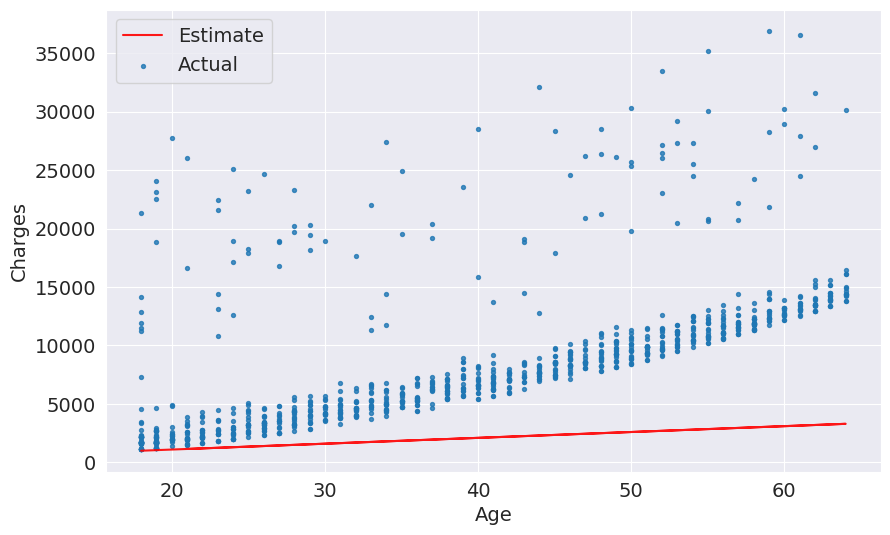

In [32]:
target = non_smokers_df.charges

plt.plot(ages, estimated_charges, "r", alpha = 0.9)
plt.scatter(ages, target, s = 8, alpha = 0.8)
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend(["Estimate", "Actual"])

Our estimates are quite poor and out line does not fit with the actual data. We can try different values of `w` and `b` to move the line around and try to find the best possible match

In [33]:
def try_parameters(w, b):
  ages = non_smokers_df.age
  target = non_smokers_df.charges

  estimated_charges = estimate_charges(ages, w, b)

  plt.plot(ages, estimated_charges, "r", alpha = 0.9)
  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Estimate", "Actual"])

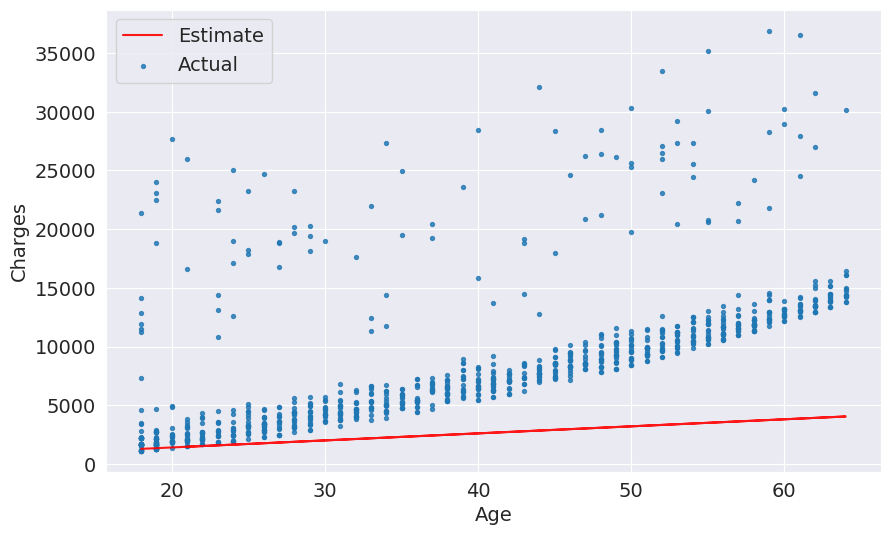

In [34]:
try_parameters(60, 200)

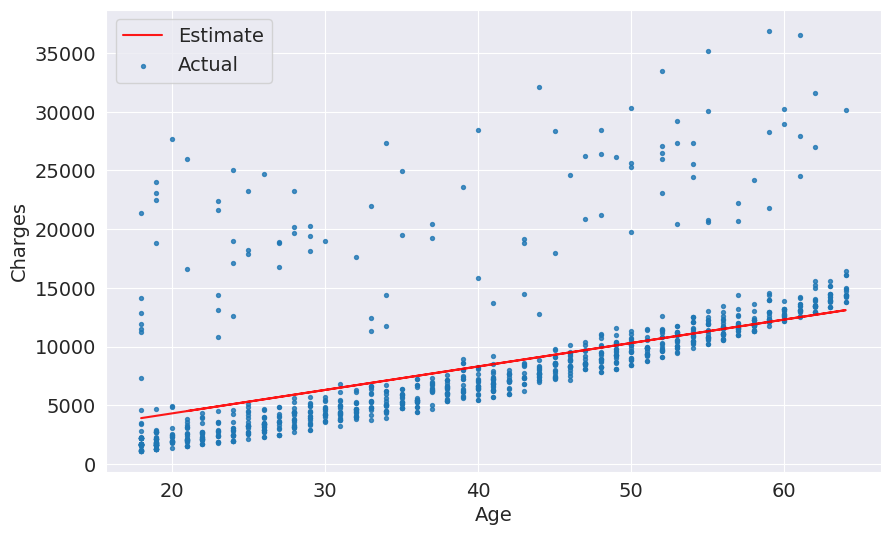

In [35]:
try_parameters(200, 300)

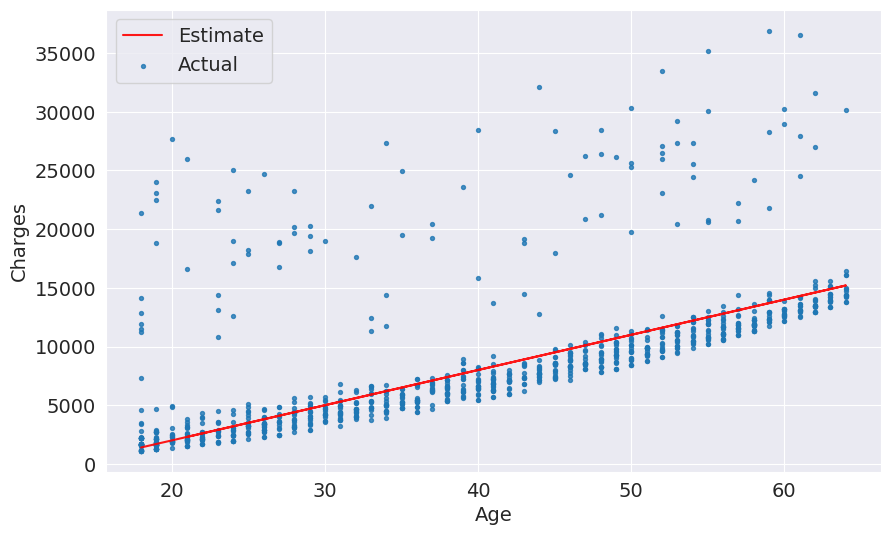

In [36]:
try_parameters(300, -4000)

As we are changing the values of `w` and `b` maunally, we are learning the approximate relationship between "age" and "charges".

It would have been better if a computer could have done that job for us.

1. We need a way to measure numerically how well the line fits the points.
2. Once the "measure of fit" has been computed, we need a way to modify `w` and `b` to improve the fit

## **Loss/Cose Function**

We can compare our model's predictions with the actual targers using the following method:

* Calculate the difference between the targets and predictions (the differenced is called the "residual").
* Square all elements of the difference to remove negative values.
* Calculate the average of the elements in the resulting matrix.
* Take the square root of the result

The result is a single number, known as the **root mean squared erroe (RMSE)**.

In [37]:
 targets = non_smokers_df.charges
 targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [38]:
predictions = estimated_charges
predictions

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [39]:
def rmse(targets, predictions):
  return np.sqrt(np.mean(np.square(targets - predictions)))

In [40]:
w = 50
b = 100

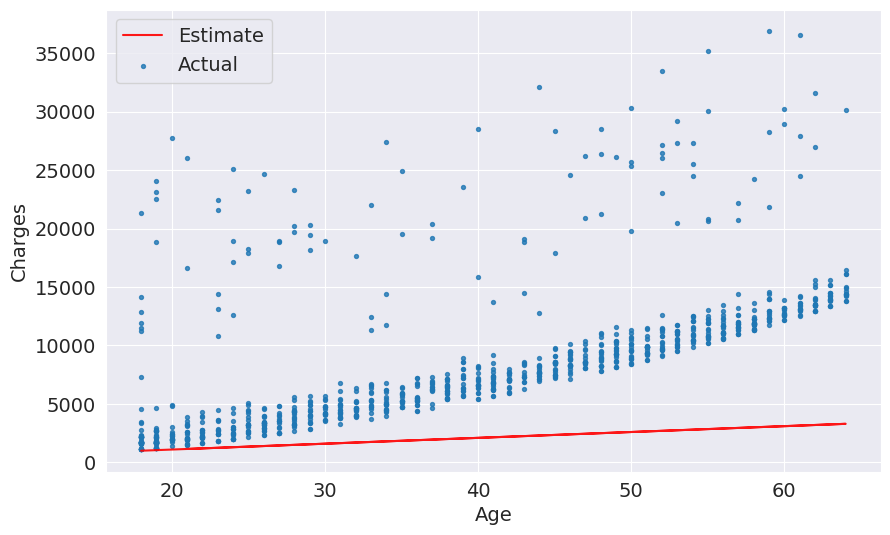

In [41]:
try_parameters(w, b)

In [42]:
targets = non_smokers_df.charges
predicted = estimate_charges(non_smokers_df.age, w, b)

In [43]:
rmse(targets, predicted)

np.float64(8461.949562575493)

In [44]:
targets

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [45]:
predicted

,age
1,1000
2,1500
3,1750
4,1700
5,1650
...,...
1332,2700
1333,2600
1334,1000
1335,1000


In [46]:
def try_parameters(w, b):
  ages = non_smokers_df.age
  target = non_smokers_df.charges
  predictions = estimate_charges(ages, w, b)

  plt.plot(ages, predictions, "r", alpha = 0.9)
  plt.scatter(ages, target, s = 8, alpha = 0.8)
  plt.xlabel("Age")
  plt.ylabel("Charges")
  plt.legend(["Prediction", "Actual"])

  loss = rmse(target, predictions)
  print(f"RMSE Loss: {loss}")

RMSE Loss: 4816.941379466545


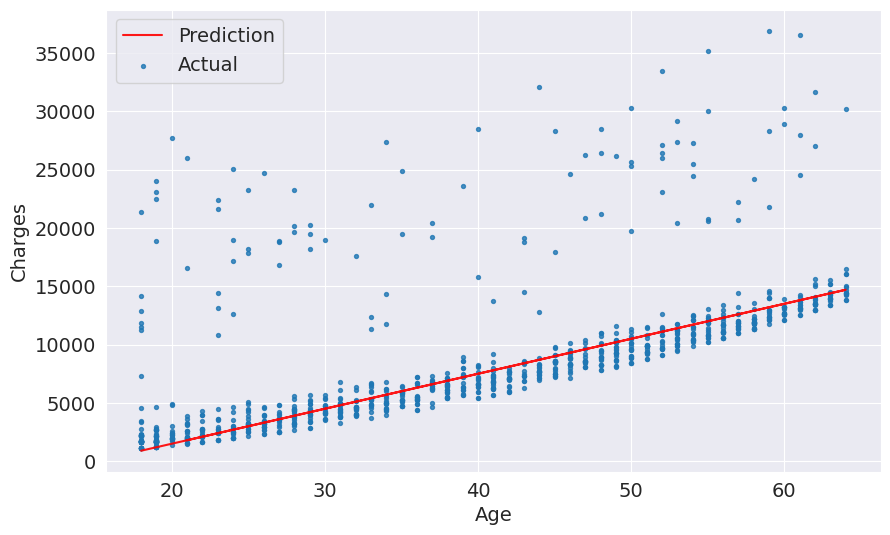

In [47]:
try_parameters(300, -4500)

## **Optimizer**

Next, we need a strategy to modify weights `w` and `b` to reduce the loss and improve the "fit" of the line to the data.

* Ordinary Least Squares
* Stochastic Gradient Descent

In [48]:
model = LinearRegression()

In [49]:
help(model.fit)

Help on method fit in module sklearn.linear_model._base:

fit(X, y, sample_weight=None) method of sklearn.linear_model._base.LinearRegression instance
    Fit linear model.

    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training data.

    y : array-like of shape (n_samples,) or (n_samples, n_targets)
        Target values. Will be cast to X's dtype if necessary.

    sample_weight : array-like of shape (n_samples,), default=None
        Individual weights for each sample.

        .. versionadded:: 0.17
           parameter *sample_weight* support to LinearRegression.

    Returns
    -------
    self : object
        Fitted Estimator.



Note that input `X` must be a 2d-Array, we we'll need to pass a dataframe instead of a single column

In [50]:
inputs = non_smokers_df[['age']]
targets = non_smokers_df.charges
print(f"Input Shape: {inputs.shape}")
print(f"Target Shape: {targets.shape}")

Input Shape: (1064, 1)
Target Shape: (1064,)


In [51]:
# Let's fit the model
model.fit(inputs, targets)

LinearRegression()

In [52]:
model.predict(np.array([[23],
                       [37],
                       [61]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([ 4055.30443855,  7796.78921819, 14210.76312614])

In [53]:
predictions = model.predict(inputs)
predictions

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [54]:
non_smokers_df.charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [55]:
rmse(targets, predictions)

np.float64(4662.505766636395)

The prediction is off by 4.6K, which in itself is not that bad

The parameters for the model are stored in `coef_` and `intercept_` properties

In [56]:
model.coef_

array([267.24891283])

In [57]:
model.intercept_

np.float64(-2091.4205565650864)

RMSE Loss: 4662.505766636395


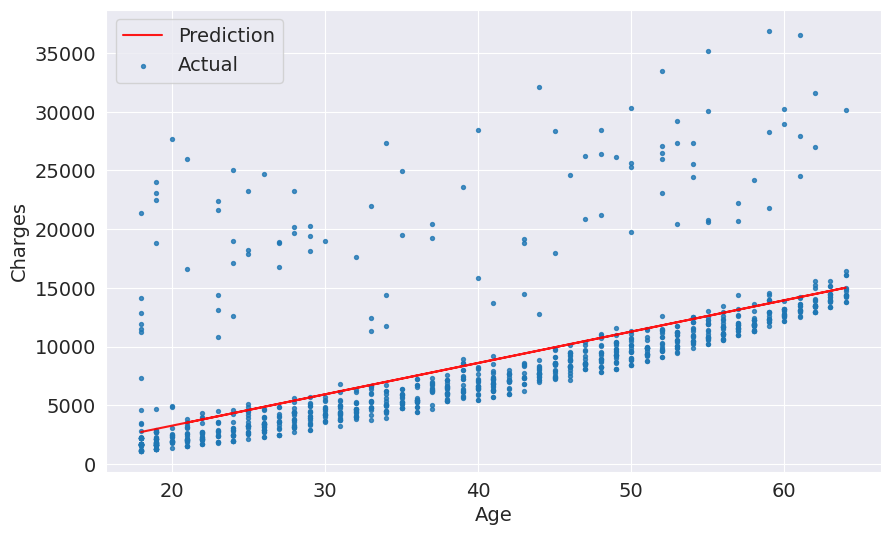

In [58]:
try_parameters(model.coef_, model.intercept_)

The line is quite close to the points, it is slightly above the cluster  of points as it is trying to account for the outliers

In [59]:
# Create inputs and targets
inputs, targets = non_smokers_df[['age']], non_smokers_df[['charges']]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 4662.505766636395


## Linear Regression using Multiple Features

So far, we've only used the "age" feature to predict the "charges". Adding another feature like "bmi" is fairly straightforward. We simply assume the following relationship

`charges = w1 x age + w2 x bmi + b`

We just need to change one line of code to include BMI

In [60]:
# Create inputs and targets
inputs, targets = non_smokers_df[['age', 'bmi']], non_smokers_df[['charges']]

# Create and train the model
model = LinearRegression().fit(inputs, targets)

# Generate predictions
predictions = model.predict(inputs)

# Compute loss to evaluate the model
loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 4662.3128354612945


Adding BMI doesn't seem to do anything, as the there is a weak correlation between BMI and charges

In [61]:
fig = px.scatter(non_smokers_df, x = "bmi", y = "charges", title = "BMI VS Charges")
fig.update_traces(marker_size = 5)
fig.show()

We don't see any real relationship between BMI and Charges

In [62]:
model.coef_, model.intercept_

(array([[266.87657817,   7.07547666]]), array([-2293.63209065]))

The parameters has almost remained the same so BMI doesn't make that much of a difference

In [63]:
input, target = non_smokers_df[['bmi']], non_smokers_df[['charges']]
model = LinearRegression().fit(input, target)

predictions = model.predict(input)
loss = rmse(target, predictions)
print(f"Loss: {loss}")

Loss: 5969.772531913293


Let's add one more numeric column: `children`, which seems to have correlation with charges

`charges = w1 x age + w2 x bmi + w3 x charges + b`

In [64]:
non_smokers_df.charges.corr(non_smokers_df.children)

np.float64(0.13892870453542192)

In [65]:
fig = px.strip(non_smokers_df, x = 'children', y = "charges", title = "Childern VS Charges")
fig.update_traces(marker_size = 4, marker_opacity = 0.7)
fig.show()

Train the model but now add children

In [66]:
inputs, targets = non_smokers_df[['age', 'bmi', 'children']], non_smokers_df[['charges']]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 4608.470405038247


We again don't see any big reduction

Let's train the linear regression model on all of the dataset and not only non_smokers
Let's use `medical_df` dataset

In [67]:
inputs, targets = medical_df[['age', 'bmi', 'children']], medical_df[['charges']]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 11355.317901125973


In [68]:
px.scatter(medical_df, x = 'age', y = 'charges', color = 'smoker')

Previously we were only seeing the 2 bottom lines so it was easier to fit but now there are more lines so it has become difficult

Hence high loss


## Using Categorical Features for Machine Learning

So far we've using numeric columns, since we can only perform computations on numbers. If we could use categorical columns like "smoker", we can train a single model for the entire dataset

First we'll need to convert the categorical values to numerical for them to work

<Axes: xlabel='smoker', ylabel='charges'>

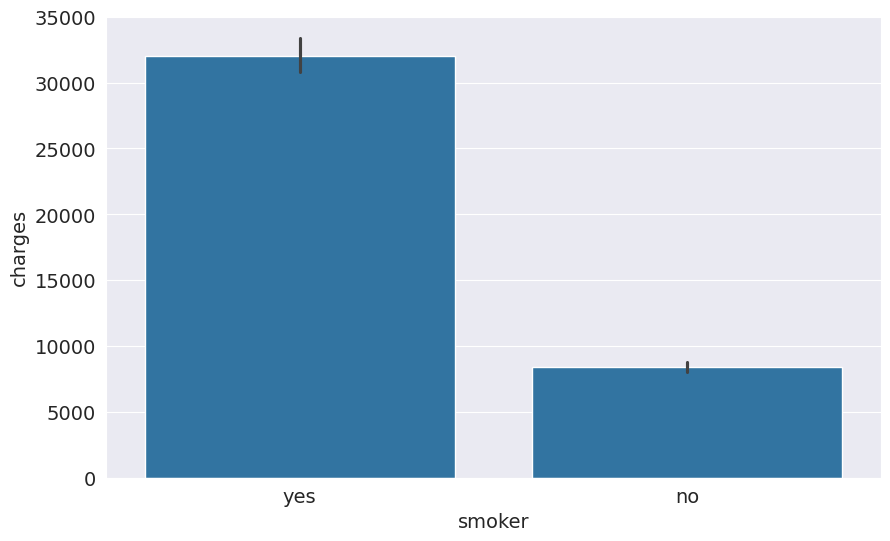

In [69]:
sns.barplot(data = medical_df, x = 'smoker', y = 'charges')

In [70]:
smoker_codes = {"no": 0, "yes": 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_codes)

In [71]:
medical_df.charges.corr(medical_df.smoker_code)

np.float64(0.787251430498478)

In [72]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0
1334,18,female,31.920,0,no,northeast,2205.98080,0
1335,18,female,36.850,0,no,southeast,1629.83350,0
1336,21,female,25.800,0,no,southwest,2007.94500,0


We can now use `smoker_code` column for linear Regression

charges = w1 x age + w2 x bmi + w3 x charges + w4 x smoker + b

In [73]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code']], medical_df[['charges']]

model = LinearRegression().fit(inputs, targets)
predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 6056.439217188081


<Axes: xlabel='sex', ylabel='charges'>

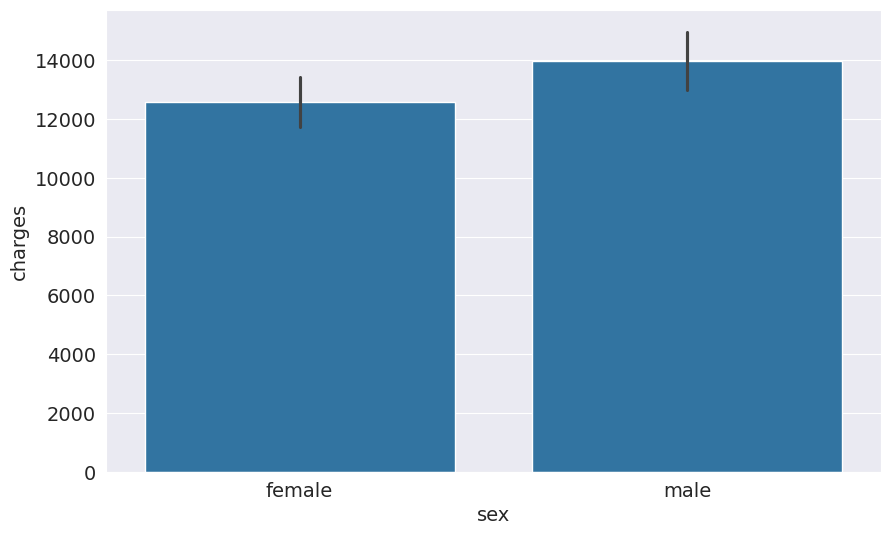

In [74]:
sns.barplot(data = medical_df, x = 'sex', y = 'charges')

In [75]:
sex_codes = {'female': 0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_codes)
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,1
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1
1334,18,female,31.920,0,no,northeast,2205.98080,0,0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0


In [76]:
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025484)

In [77]:
inputs, targets = medical_df[['age', 'bmi', 'children', 'smoker_code', 'sex_code']], medical_df[['charges']]

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 6056.100708754546


Hardly any change at all, so we can even ignore the sex column

<Axes: xlabel='region', ylabel='charges'>

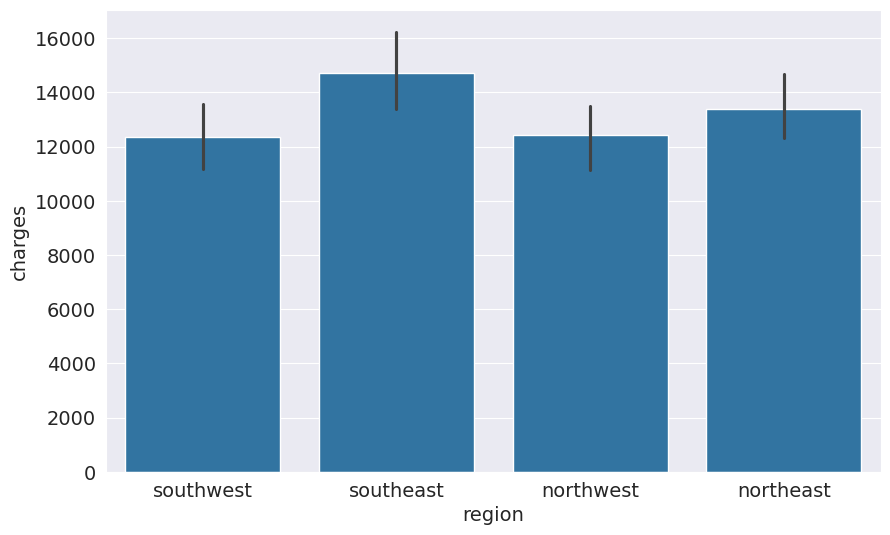

In [78]:
sns.barplot(medical_df, x = 'region', y = 'charges')

In [79]:
enc = preprocessing.OneHotEncoder()
enc.fit(medical_df[['region']])
enc.categories_

[array(['northeast', 'northwest', 'southeast', 'southwest'], dtype=object)]

In [80]:
one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [81]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot

In [82]:
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0.0,0.0,0.0,1.0


Now we can even include region in our model as well

`$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times northeast + w_7 northwest + w_8 southeast + w_9 southwest + b$

In [83]:
input_cols = ['age', 'bmi', 'children', 'smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
inputs, targets = medical_df[input_cols], medical_df['charges']

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 6041.6796511744515


Again, not that much of a difference

## Model Improvements

### Feature Scaling

Recall that due to regulatory requirements, we also need to explain the rationale behind the predictions of our model

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \times smoker + w_5 \times sex + w_6 \times region + b$

In [84]:
model.coef_

array([  256.85635254,   339.19345361,   475.50054515, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [85]:
model.intercept_

np.float64(-12525.547811195444)

In [86]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,256.856353
1,bmi,339.193454
2,children,475.500545
3,smoker_code,23848.534542
4,sex_code,-131.314359
5,northeast,587.009235
6,northwest,234.045336
7,southeast,-448.012814
8,southwest,-373.041756
9,1,-12525.547811


In [87]:
medical_df[input_cols].loc[10]

,10
age,25.00
bmi,26.22
children,0.00
smoker_code,0.00
sex_code,1.00
northeast,1.00
northwest,0.00
southeast,0.00
southwest,0.00


In [88]:
model.predict([[28, 30, 2, 1, 0, 0, 1, 0, 0.]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



array([29875.81463599])

The differemce in the range of values that they can change to is a lot, for example, bmi can be max 40 and not more than that. Similarly, age can got upto 64.

These values are introducing noise in our data and the way to deal with them is through a method called `Standardization`

After applying this method the values center around 0, from "-1 to 1" range and it becomes easy to get information out of it

In [89]:
numeric_cols = ['age', 'bmi', 'children']
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])

StandardScaler()

In [90]:
scaler.mean_

array([39.20702541, 30.66339686,  1.09491779])

In [91]:
scaler.var_

array([197.25385199,  37.16008997,   1.45212664])

We can now scale the data as follows

In [92]:
scaled_inputs = scaler.transform(medical_df[numeric_cols])
scaled_inputs

array([[-1.43876426, -0.45332   , -0.90861367],
       [-1.50996545,  0.5096211 , -0.07876719],
       [-0.79795355,  0.38330685,  1.58092576],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367],
       [-1.29636188, -0.79781341, -0.90861367],
       [ 1.55168573, -0.26138796, -0.90861367]])

This can now be combined with the categorical data

In [93]:
cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

In [94]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis = 1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print(f"Loss: {loss}")

Loss: 6041.6796511744515


In [95]:
inputs[0]

array([-1.43876426, -0.45332   , -0.90861367,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  1.        ])

We can now compare the weights in the format

$charges = w_1 \times age + w_2 \times bmi + w_3 \times charges + w_4 \ times smoker + w_5 \times region + b$

In [96]:
model.coef_

array([ 3607.47273619,  2067.69196584,   572.99820995, 23848.53454191,
        -131.3143594 ,   587.00923503,   234.0453356 ,  -448.01281436,
        -373.04175627])

In [97]:
model.intercept_

np.float64(8466.48321541183)

In [98]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})

weights_df.sort_values('weight', ascending = False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


As you can see, the most important features are:

1. Smoker
2. Age
3. BMI

## How to Approach a Machine Learning Problem

Here's a strategy you can apply to approach any machine learning problem:

1. Explore the data and find correlations between inputs and targets
2. Pick the right model, loss functions and optimizer for problem at hand
3. Scale numeric variables and one hot encode categorical data
4. Set aside a test set (using a fraction of the training set)
5. Train the model
6. Make predictions on the test set and compute the loss

We'll apply this process to several problems in future.

## Summary and Further Reading

We've covered the following topics in this course

* A typical problem statement for machine learning
* Downloading and exploring a dataset for machine learning
* Linear Regression with one variable using Scikit-learn
* Linear Regression with multiple variable_type
* Using categorical features for machine learning
* Regression coefficients and feature importance
* Creating a traing and test for reporing results